# HOUSE PRICE PREDICTION

In [1]:
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class
# MSZoning: The general zoning classification
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access
# Alley: Type of alley access
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property

# Neighborhood: Physical locations within Ames city limits

# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)

# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating

# YearBuilt: Original construction date
# YearRemodAdd: Remodel date
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation

# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area

# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system

# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet

# GrLivArea: Above grade (ground) living area square feet

# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade

# Bedroom: Number of bedrooms above basement level

# Kitchen: Number of kitchens
# KitchenQual: Kitchen quality

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Functional: Home functionality rating

# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality

# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition

# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet
# PoolQC: Pool quality

# SaleType: Type of sale
# SaleCondition: Condition of sale

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm , skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [91]:
train_data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\House_Price_Prediction\Train.csv')
test_data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\House_Price_Prediction\Test.csv')

In [92]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [93]:
total = train_data.isnull().sum().sort_values(ascending=False)
total=total[total>0]
percent = (total/total.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,76.473684
MiscFeature,1406,74.000000
Alley,1369,72.052632
Fence,1179,62.052632
FireplaceQu,690,36.315789
LotFrontage,259,13.631579
GarageCond,81,4.263158
GarageType,81,4.263158
GarageYrBlt,81,4.263158
GarageFinish,81,4.263158


we will drop PoolQC,MiscFeature,Alley,Fence

In [94]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [95]:
num_features=train_data.select_dtypes(include=[np.number])
cat_features=train_data.select_dtypes(include=[np.object])

In [96]:
num_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [97]:
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
cor_mat= train_data[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [99]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

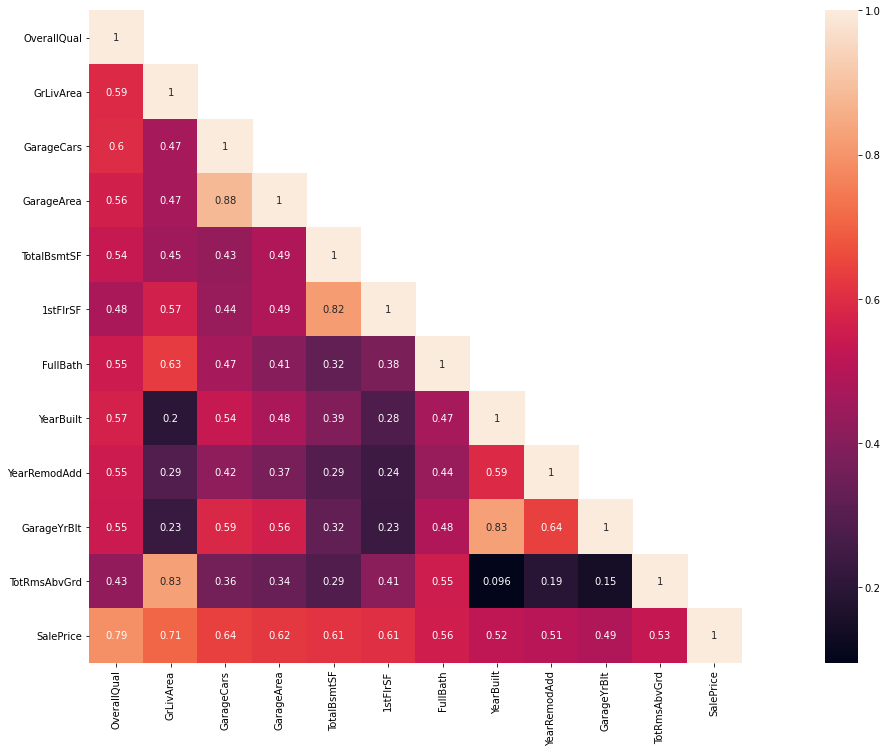

In [100]:
cor_mat= train_data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

# Univariate Analysis

For a house rooms,bedrooms,square feet,quality&condition,garage,kitchen,porch,basement etc are very important.

In [101]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

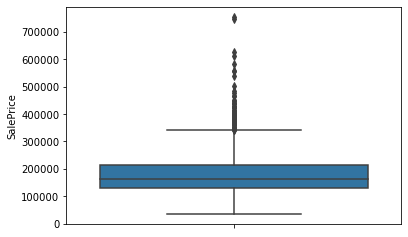

In [102]:
sns.boxplot(train_data['SalePrice'],orient ='v')

Text(0.5, 1.0, 'Sales Price')

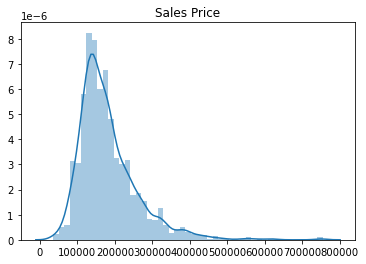

In [103]:
sns.distplot(a=train_data['SalePrice'],axlabel=False).set_title('Sales Price')

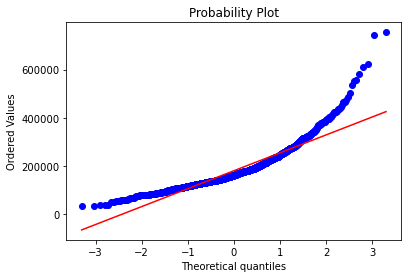

In [104]:
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [105]:
#SalePrice is not normally distributed. So we will use log transform to reduce skewness

GrLivArea: living area square feet

Text(0.5, 1.0, 'GrLivArea')

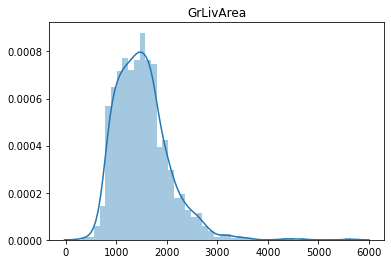

In [106]:
sns.distplot(a=train_data['GrLivArea'],axlabel=False).set_title('GrLivArea')

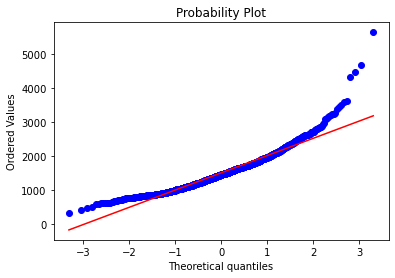

In [107]:
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)
plt.show()

Text(0.5, 1.0, '1stFlrSF')

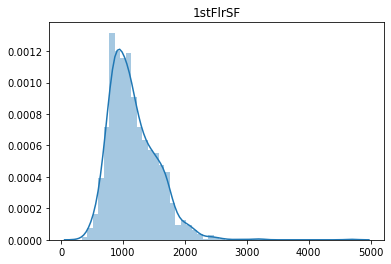

In [108]:
sns.distplot(a=train_data['1stFlrSF'],axlabel=False).set_title('1stFlrSF')

Text(0.5, 1.0, '2ndFlrSF')

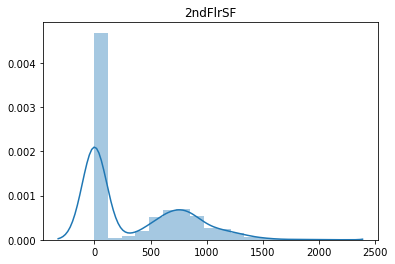

In [109]:
sns.distplot(a=train_data['2ndFlrSF'],axlabel=False).set_title('2ndFlrSF')

In [110]:
print("SalePrice Skewness: %f" % train_data['SalePrice'].skew())
print("SalePrice Kurtosis: %f" % train_data['SalePrice'].kurt())

SalePrice Skewness: 1.882876
SalePrice Kurtosis: 6.536282


In [111]:
print("GrLivArea Skewness: %f" % train_data['GrLivArea'].skew())
print("GrLivArea Kurtosis: %f" % train_data['GrLivArea'].kurt())

GrLivArea Skewness: 1.366560
GrLivArea Kurtosis: 4.895121


In [112]:
print("1stFlrSF Skewness: %f" % train_data['1stFlrSF'].skew())
print("1stFlrSF Kurtosis: %f" % train_data['1stFlrSF'].kurt())

1stFlrSF Skewness: 1.376757
1stFlrSF Kurtosis: 5.745841


In [113]:
print("2ndFlrSF Skewness: %f" % train_data['2ndFlrSF'].skew())
print("2ndFlrSF Kurtosis: %f" % train_data['2ndFlrSF'].kurt())

2ndFlrSF Skewness: 0.813030
2ndFlrSF Kurtosis: -0.553464


# Bivariate analysis

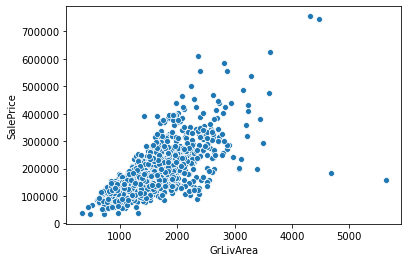

In [114]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)

Linear relationship between SalePrice and GrLivArea.We can see outlier both GrLivArea(GrLivArea>3500) and SalePrice(SalePrice>600000)

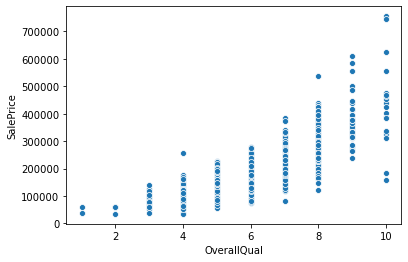

In [115]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_data)

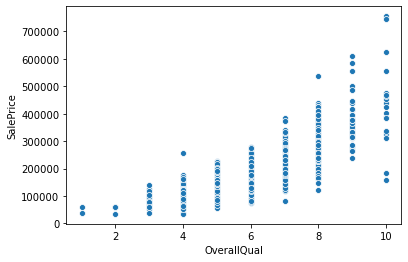

In [116]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_data)

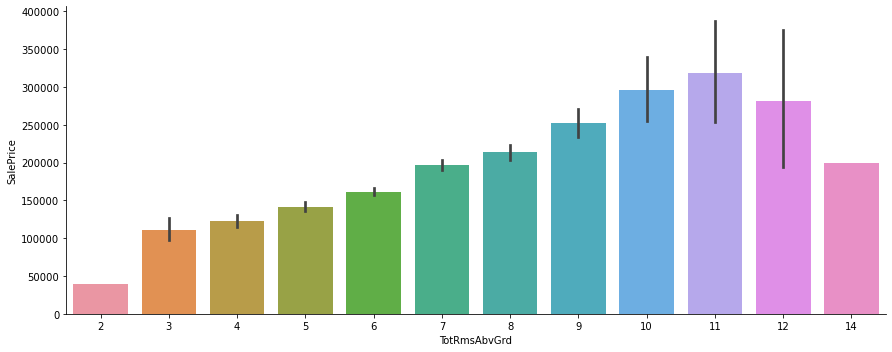

In [117]:
sns.factorplot(data=train_data,x='TotRmsAbvGrd',y='SalePrice',kind='bar',size=5,aspect=2.5) 

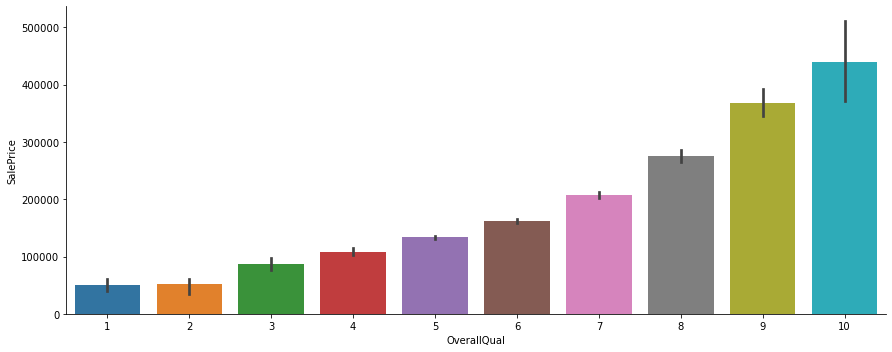

In [118]:
sns.factorplot(data=train_data,x='OverallQual',y='SalePrice',kind='bar',size=5,aspect=2.5) 

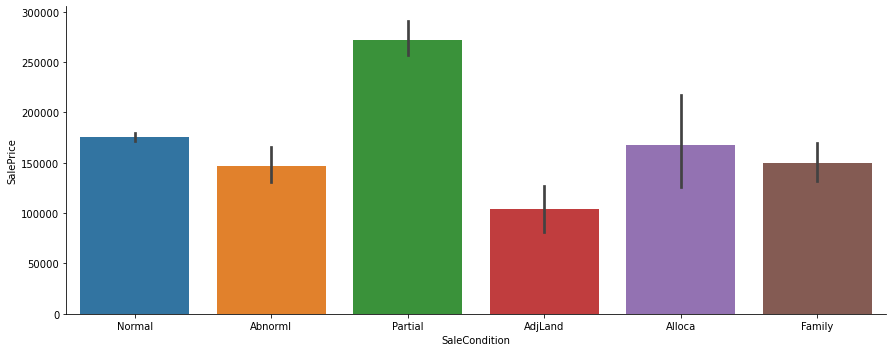

In [119]:
sns.factorplot(data=train_data,x='SaleCondition',y='SalePrice',kind='bar',size=5,aspect=2.5) 

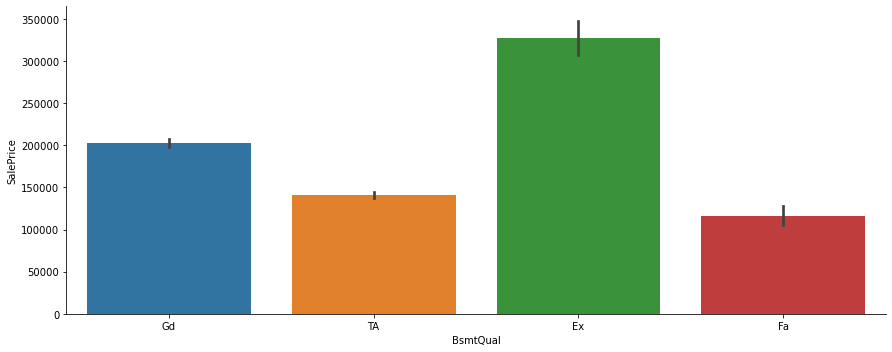

In [120]:
sns.factorplot(data=train_data,x='BsmtQual',y='SalePrice',kind='bar',size=5,aspect=2.5) 

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

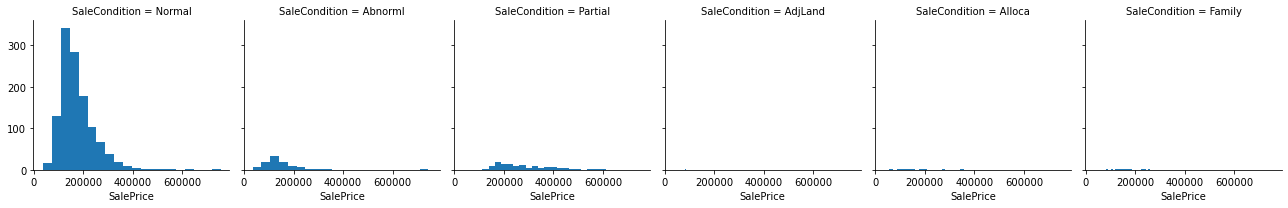

In [121]:
g = sns.FacetGrid(train_data, col='SaleCondition')
g.map(plt.hist, 'SalePrice', bins=20)
train_data['SaleCondition'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

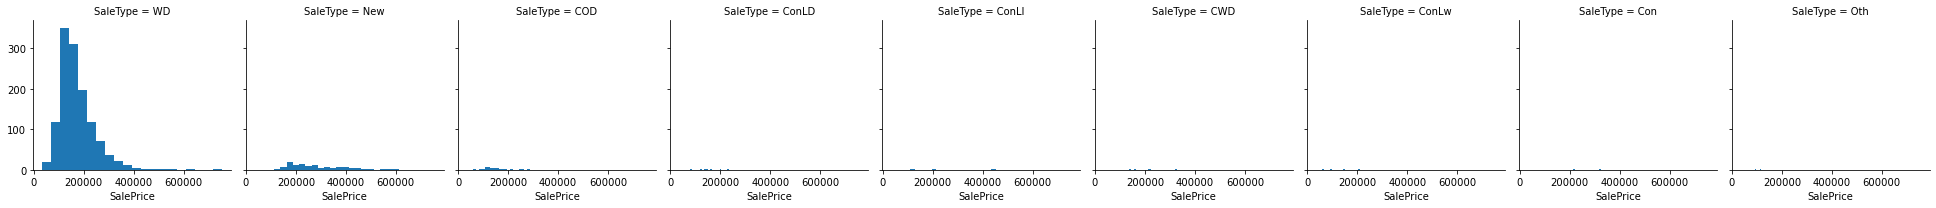

In [122]:
g = sns.FacetGrid(train_data, col='SaleType')
g.map(plt.hist, 'SalePrice', bins=20)
train_data['SaleType'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

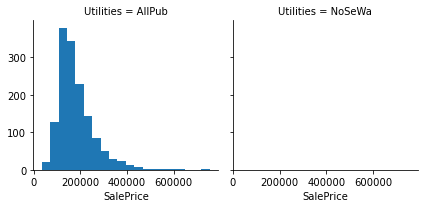

In [123]:
g = sns.FacetGrid(train_data, col='Utilities')
g.map(plt.hist, 'SalePrice', bins=20)
train_data['Utilities'].value_counts()

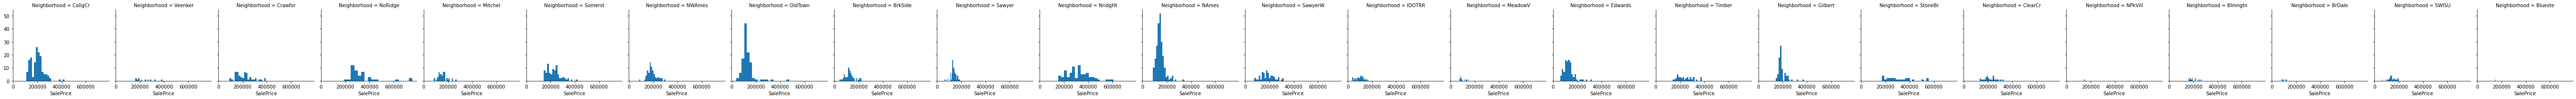

In [124]:
g = sns.FacetGrid(train_data, col='Neighborhood')
g.map(plt.hist, 'SalePrice', bins=20)

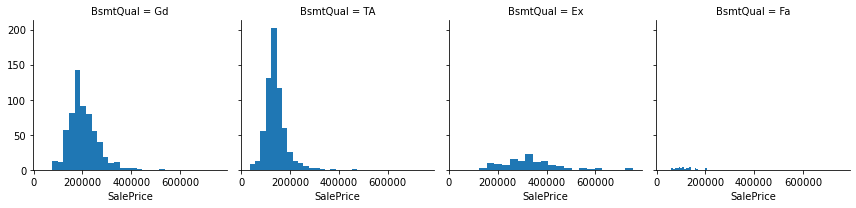

In [125]:
g = sns.FacetGrid(train_data, col='BsmtQual')
g.map(plt.hist, 'SalePrice', bins=20)

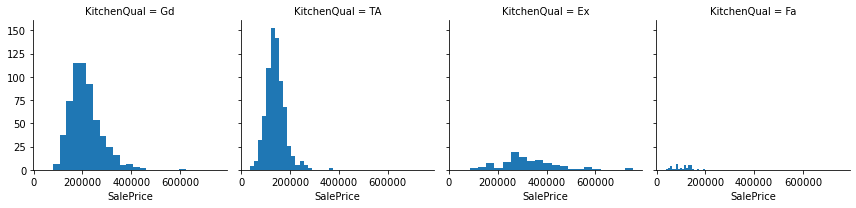

In [126]:
g = sns.FacetGrid(train_data, col='KitchenQual')
g.map(plt.hist, 'SalePrice', bins=20)

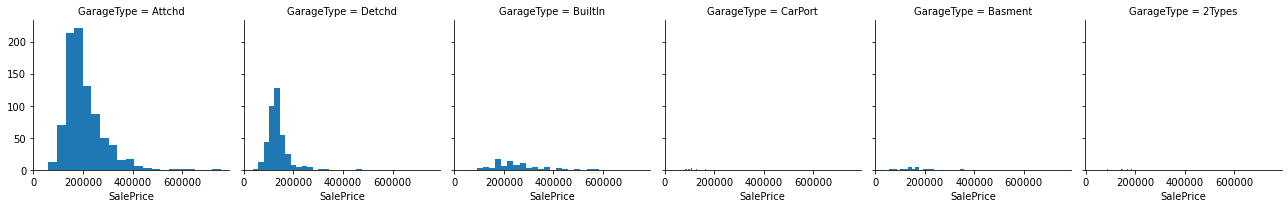

In [127]:
g = sns.FacetGrid(train_data, col='GarageType')
g.map(plt.hist, 'SalePrice', bins=20)

# Data Preprocessing

In [128]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [129]:
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [130]:
all_data=pd.concat([train_data,test_data],axis=0)

In [131]:
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [132]:
all_data.drop(['SaleType'],axis=1,inplace=True)

In [133]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [134]:
Id=all_data['Id']

In [135]:
all_data.drop(['Id'],axis=1,inplace=True)

In [136]:
all_data.shape

(2919, 72)

In [137]:
total = all_data.isnull().sum().sort_values(ascending=False)
total=total[total>0]
percent = (total/total.count()).sort_values(ascending=False)
missing_data2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data2

,Total,Percent
LotFrontage,486,18.000000
GarageFinish,159,5.888889
GarageCond,159,5.888889
GarageQual,159,5.888889
GarageYrBlt,159,5.888889
GarageType,157,5.814815
BsmtCond,82,3.037037
BsmtExposure,82,3.037037
BsmtQual,81,3.000000
BsmtFinType2,80,2.962963


In [138]:
all_data['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [139]:
all_data['LotFrontage'].fillna(all_data['LotFrontage'].median(),inplace=True)

In [140]:
# basement related features.
#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)

In [141]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)

In [142]:
all_data['GarageYrBlt'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)
all_data['GarageQual'].fillna('None',inplace=True)   
all_data['GarageFinish'].fillna('None',inplace=True)   
all_data['GarageCond'].fillna('None',inplace=True)  
all_data['GarageType'].fillna('None',inplace=True) 

In [143]:
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MasVnrType'].fillna('None',inplace=True)

In [144]:
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)

In [145]:
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)

In [146]:
for col in ['KitchenQual','Exterior2nd','Exterior1st','Electrical']:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)

In [147]:
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [150]:
all_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath'
              ,'BsmtFullBath','BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'],axis=1,inplace=True)

In [159]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         2919 non-null   int64  
 1   MSZoning           2919 non-null   object 
 2   LotFrontage        2919 non-null   float64
 3   LotArea            2919 non-null   int64  
 4   Street             2919 non-null   object 
 5   LotShape           2919 non-null   object 
 6   LandContour        2919 non-null   object 
 7   LotConfig          2919 non-null   object 
 8   LandSlope          2919 non-null   object 
 9   Neighborhood       2919 non-null   object 
 10  Condition1         2919 non-null   object 
 11  Condition2         2919 non-null   object 
 12  BldgType           2919 non-null   object 
 13  HouseStyle         2919 non-null   object 
 14  OverallQual        2919 non-null   int64  
 15  OverallCond        2919 non-null   int64  
 16  YearBuilt          2919 

# Log transform 

In [160]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index


In [155]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'Total_sqr_footage',
       'Total_Bathrooms', 'Total_porch_sf'],
      dtype='object')

In [161]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) 

In [162]:
skewed_feats

MSSubClass            1.375457
LotFrontage           1.674852
LotArea              12.822431
OverallQual           0.197110
OverallCond           0.570312
YearBuilt            -0.599806
YearRemodAdd         -0.451020
MasVnrArea            2.613592
BsmtUnfSF             0.919339
LowQualFinSF         12.088761
GrLivArea             1.269358
BedroomAbvGr          0.326324
KitchenAbvGr          4.302254
TotRmsAbvGrd          0.758367
Fireplaces            0.733495
GarageYrBlt          -3.906205
GarageCars           -0.219581
GarageArea            0.239257
PoolArea             16.898328
MiscVal              21.947195
MoSold                0.195884
YrSold                0.132399
TotalSF               1.511479
Total_sqr_footage     1.834437
Total_Bathrooms       0.492247
Total_porch_sf        1.376649
dtype: float64

In [163]:
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'PoolArea', 'MiscVal', 'TotalSF',
       'Total_sqr_footage', 'Total_porch_sf'],
      dtype='object')

In [164]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [165]:
y=np.log1p(train_data['SalePrice'])

# LabelEncoder

In [166]:
for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

In [167]:
Id_df=pd.DataFrame(Id,columns=['Id'])

In [168]:
all_data.shape

(2919, 62)

In [169]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,4.110874,3,4.189655,9.042040,1,3,3,4,0,5,...,2,0.0,0.000000,2,2008,4,7.850493,7.790282,3.5,4.127134
1,3.044522,3,4.394449,9.169623,1,3,3,2,0,24,...,2,0.0,0.000000,5,2007,4,7.833996,7.714677,2.5,5.700444
2,4.110874,3,4.234107,9.328212,1,0,3,4,0,5,...,2,0.0,0.000000,9,2008,4,7.903596,7.728856,3.5,3.761200
3,4.262680,3,4.110874,9.164401,1,0,3,0,0,6,...,2,0.0,0.000000,2,2006,0,7.813592,7.567346,2.0,5.730100
4,4.110874,3,4.442651,9.565284,1,0,3,2,0,15,...,2,0.0,0.000000,12,2008,4,8.114923,7.956477,3.5,5.624018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,4,3.091042,7.568896,1,3,3,4,0,10,...,2,0.0,0.000000,6,2006,4,7.401842,6.996681,1.5,0.000000
1455,5.081404,4,3.091042,7.546974,1,3,3,4,0,10,...,2,0.0,0.000000,4,2006,0,7.401842,7.204149,1.5,3.218876
1456,3.044522,3,5.081404,9.903538,1,3,3,4,0,11,...,2,0.0,0.000000,9,2006,0,7.803435,7.803435,2.0,6.163315
1457,4.454347,3,4.143135,9.253591,1,3,3,4,0,11,...,2,0.0,6.552508,7,2006,4,7.540622,7.176255,1.5,4.727388


In [170]:
all_data.to_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\House_Price_Prediction\all_data_processed.csv')
y.to_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\House_Price_Prediction\Target.csv')